In [1]:
import os
import tarfile
import urllib

DL_ROOT = "https://github.com/ageron/handson-ml2/tree/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DL_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    #urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pan
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pan.read_csv(csv_path)x

In [3]:
fetch_housing_data()
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


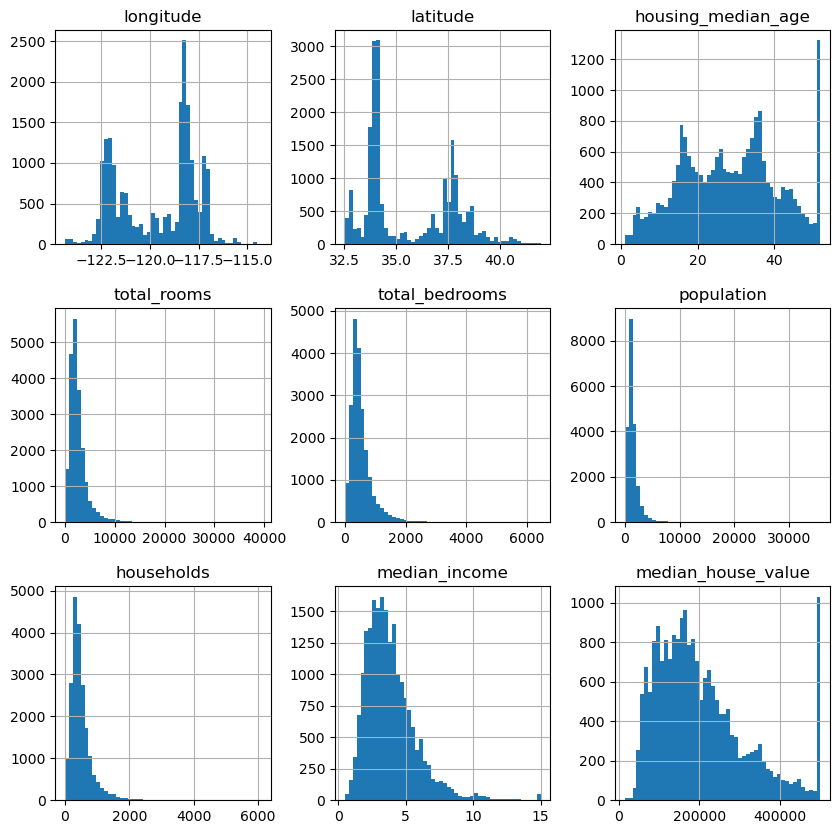

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10, 10))
plt.show()

In [9]:
housing["total_rooms"].value_counts()

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64

In [10]:
import numpy as np
def split_train_test(data, test_ratio, random_state=50):
    np.random.seed(random_state)
    shuff_ind = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_ind = shuff_ind[:test_set_size]
    train_ind = shuff_ind[test_set_size:]
    return data.iloc[train_ind], data.iloc[test_ind]
    

In [11]:
housing_id = housing.reset_index()
housing_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) & 0xffffffff < test_ratio*2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
train_set, test_set = split_train_test_by_id(housing_id, 0.2, "index")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
from sklearn.model_selection import train_test_split

train_set_sk, test_set_sk = train_test_split(housing, test_size=0.2, random_state=50)
train_set_sk

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4450,-118.21,34.07,42.0,902.0,318.0,1312.0,323.0,1.9375,168800.0,<1H OCEAN
14253,-117.10,32.71,29.0,3422.0,713.0,2775.0,644.0,1.7075,86900.0,NEAR OCEAN
15338,-117.29,33.20,16.0,2150.0,461.0,1428.0,407.0,2.4754,157300.0,NEAR OCEAN
18156,-122.06,37.36,35.0,2693.0,493.0,1343.0,455.0,6.0777,327500.0,<1H OCEAN
13431,-117.42,34.10,18.0,3977.0,809.0,2231.0,742.0,4.1399,115400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,181400.0,NEAR OCEAN
15649,-122.41,37.79,52.0,2161.0,544.0,904.0,431.0,3.5066,350000.0,NEAR BAY
10123,-117.92,33.93,12.0,4415.0,890.0,1532.0,854.0,3.7500,166300.0,<1H OCEAN
5600,-118.27,33.79,39.0,1513.0,365.0,1227.0,354.0,3.3929,184600.0,<1H OCEAN


<Axes: >

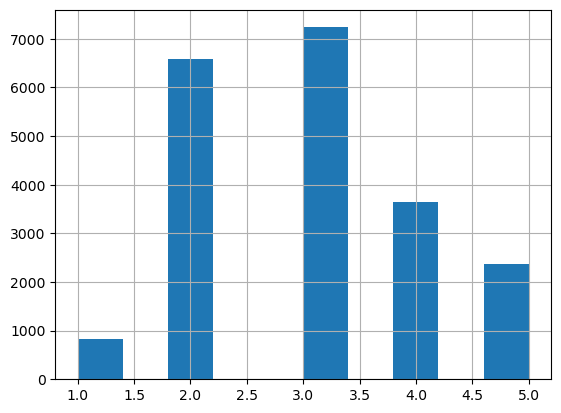

In [15]:
housing["income_cat"] = pan.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_ind, test_ind in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_ind]
    strat_test_set = housing.loc[test_ind]


In [17]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,4
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,4
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,4
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,3
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,152800.0,<1H OCEAN,3
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,171400.0,<1H OCEAN,2
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,275000.0,NEAR OCEAN,3
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN,5


In [18]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3753,-118.39,34.17,40.0,1696.0,372.0,835.0,385.0,3.6563,222400.0,<1H OCEAN,3
5381,-118.40,34.03,43.0,1006.0,201.0,520.0,199.0,6.5669,372800.0,<1H OCEAN,5
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,<1H OCEAN,5
4457,-118.18,34.09,44.0,1688.0,426.0,1605.0,384.0,3.3785,184900.0,<1H OCEAN,3
8060,-118.20,33.85,46.0,1854.0,462.0,1360.0,429.0,2.4844,158200.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,276100.0,NEAR BAY,4
16640,-120.66,35.29,23.0,1932.0,487.0,1380.0,472.0,1.9647,253600.0,NEAR OCEAN,2
2792,-118.39,37.36,38.0,1813.0,410.0,902.0,396.0,2.3261,98400.0,INLAND,2
11438,-117.96,33.65,18.0,3603.0,879.0,1549.0,756.0,4.0229,363100.0,<1H OCEAN,3


In [19]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,4
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,4
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,4
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,3
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,152800.0,<1H OCEAN,3
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,171400.0,<1H OCEAN,2
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,275000.0,NEAR OCEAN,3
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN,5


In [20]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3753,-118.39,34.17,40.0,1696.0,372.0,835.0,385.0,3.6563,222400.0,<1H OCEAN,3
5381,-118.40,34.03,43.0,1006.0,201.0,520.0,199.0,6.5669,372800.0,<1H OCEAN,5
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,<1H OCEAN,5
4457,-118.18,34.09,44.0,1688.0,426.0,1605.0,384.0,3.3785,184900.0,<1H OCEAN,3
8060,-118.20,33.85,46.0,1854.0,462.0,1360.0,429.0,2.4844,158200.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,276100.0,NEAR BAY,4
16640,-120.66,35.29,23.0,1932.0,487.0,1380.0,472.0,1.9647,253600.0,NEAR OCEAN,2
2792,-118.39,37.36,38.0,1813.0,410.0,902.0,396.0,2.3261,98400.0,INLAND,2
11438,-117.96,33.65,18.0,3603.0,879.0,1549.0,756.0,4.0229,363100.0,<1H OCEAN,3


In [21]:
full_income_cat_ratio = housing["income_cat"].value_counts()/len(housing)

In [22]:
strat_income_cat_ratio = strat_test_set["income_cat"].value_counts()/len(strat_test_set)

<Axes: >

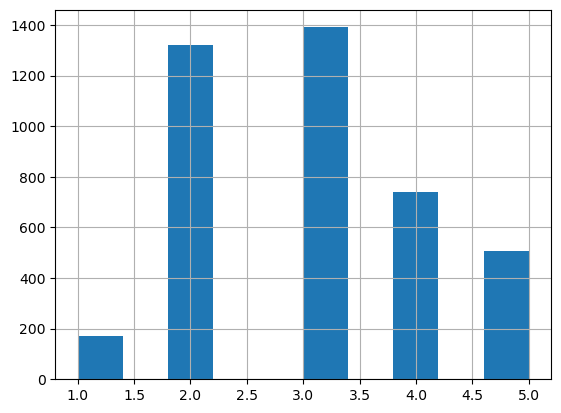

In [23]:
test_set_sk["income_cat"] = pan.cut(test_set_sk["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
test_set_sk["income_cat"].hist()

In [24]:
test_income_cat_ratio = test_set_sk["income_cat"].value_counts()/len(test_set_sk)

In [25]:
set_col = []
strat_col = []
test_col = []
strat_err = []
test_err = []
for i in range(1,6):
    set_col.append(full_income_cat_ratio[i])
    strat_col.append(strat_income_cat_ratio[i])
    test_col.append(test_income_cat_ratio[i])
    strat_err.append(100*(full_income_cat_ratio[i] - strat_income_cat_ratio[i])/full_income_cat_ratio[i])
    test_err.append(100*(full_income_cat_ratio[i] - test_income_cat_ratio[i])/full_income_cat_ratio[i])
    
comparison = pan.DataFrame(
    {
        "Set":set_col,
        "Startified":strat_col,
        "Random":test_col,
        "% Err. strat":strat_err,
        "% Err. rand":test_err,
    },
    index=[1,2,3,4,5]
)

comparison

,Set,Startified,Random,% Err. strat,% Err. rand
1,0.039826,0.039971,0.041667,-0.364964,-4.622871
2,0.318847,0.318798,0.319767,0.015195,-0.288710
3,0.350581,0.350533,0.336967,0.013820,3.883361
4,0.176308,0.176357,0.179264,-0.027480,-1.676285
5,0.114438,0.114341,0.122335,0.084674,-6.900931


In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_ = set_.drop("income_cat", axis=1, inplace=True)

In [27]:
housing_strat_train_set = strat_train_set.copy()
#housing_strat_train_set = housing_strat_train_set.drop("2*lat", axis=1)
#housing_strat_train_set = housing_strat_train_set.drop("income_cat", axis=1)
housing_strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,152800.0,<1H OCEAN
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,171400.0,<1H OCEAN
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,275000.0,NEAR OCEAN
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

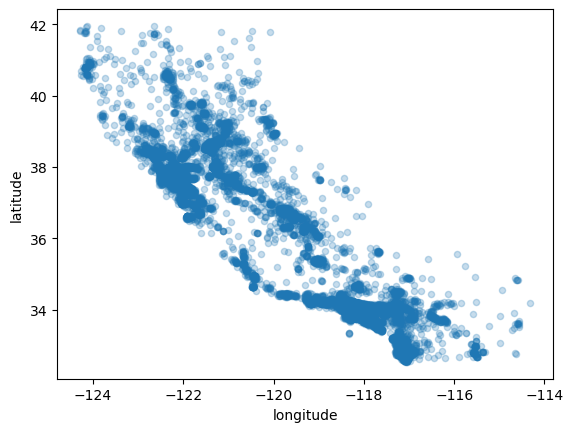

In [28]:
housing_strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.25)

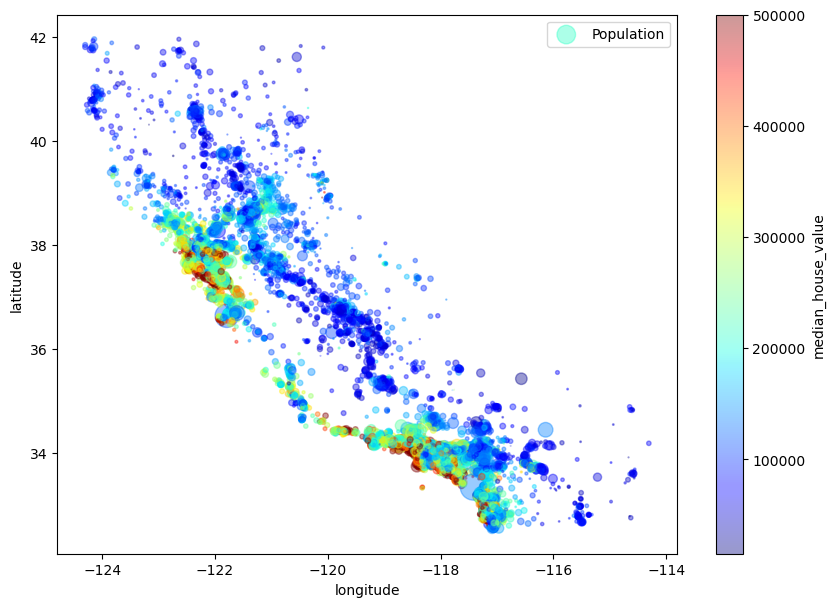

In [29]:
housing_strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                             s=housing_strat_train_set["population"]/100, label="Population",
                             c="median_house_value", figsize=(10, 7),cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [30]:
corr_matrix = housing_strat_train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_3890/790065100.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_strat_train_set.corr()


median_house_value    1.000000
median_income         0.686977
total_rooms           0.137150
housing_median_age    0.103604
households            0.066519
total_bedrooms        0.052712
population           -0.024756
longitude            -0.048672
latitude             -0.140515
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

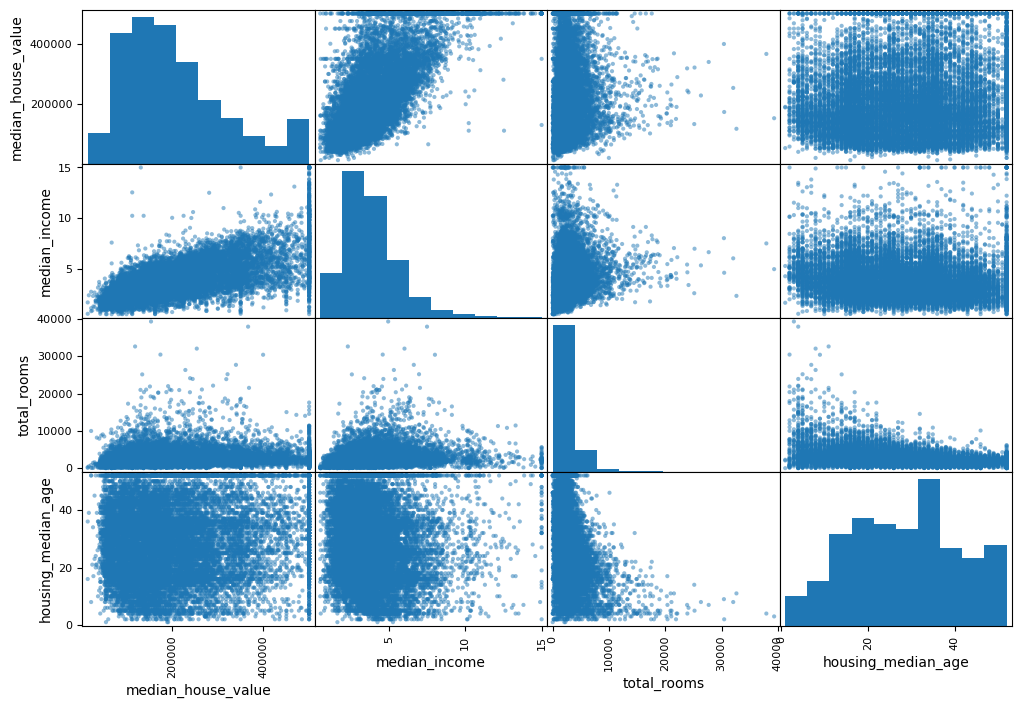

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_strat_train_set[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

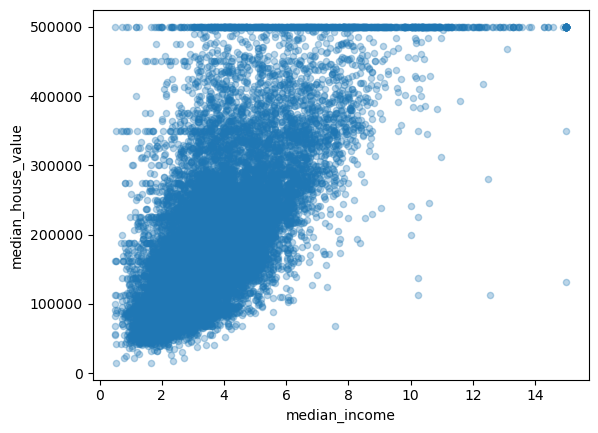

In [32]:
housing_strat_train_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)

In [33]:
housing_strat_train_set["rooms_per_household"] = housing_strat_train_set["total_rooms"]/housing_strat_train_set["households"]
housing_strat_train_set["bedrooms_per_room"] = housing_strat_train_set["total_bedrooms"]/housing_strat_train_set["total_rooms"]
housing_strat_train_set["population_per_household"] = housing_strat_train_set["population"]/housing_strat_train_set["households"]
housing_strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,6.495181,0.164348,3.291566
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,6.487026,0.168000,2.898204
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,7.129129,0.156698,2.654655
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,4.728041,0.227581,3.403716
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,4.959350,0.190164,2.516260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,152800.0,<1H OCEAN,4.487500,0.226184,5.615000
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,171400.0,<1H OCEAN,4.796341,0.241292,2.706098
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,275000.0,NEAR OCEAN,4.826996,0.242615,1.832700
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN,6.970732,0.146256,2.435772


In [34]:
corr_matrix = housing_strat_train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_3890/790065100.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_strat_train_set.corr()


median_house_value          1.000000
median_income               0.686977
rooms_per_household         0.151376
total_rooms                 0.137150
housing_median_age          0.103604
households                  0.066519
total_bedrooms              0.052712
population                 -0.024756
population_per_household   -0.027228
longitude                  -0.048672
latitude                   -0.140515
bedrooms_per_room          -0.255905
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>

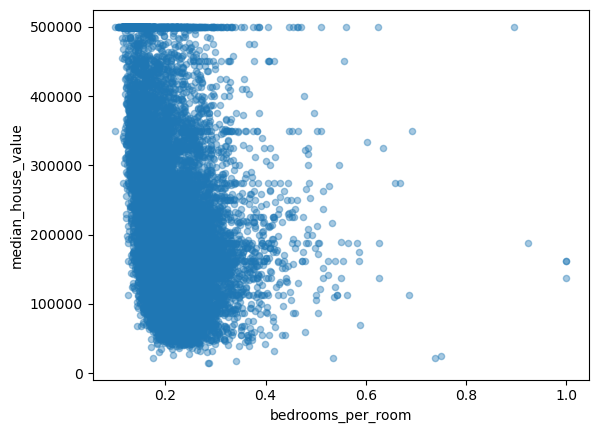

In [35]:
housing_strat_train_set.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.4)

In [36]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,152800.0,<1H OCEAN
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,171400.0,<1H OCEAN
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,275000.0,NEAR OCEAN
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN


In [37]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [39]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1166.    ,
        410.    ,    3.5385])

In [41]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1166.    ,
        410.    ,    3.5385])

In [42]:
X = imputer.transform(housing_num)
X

array([[-117.03  ,   33.18  ,   17.    , ..., 2732.    ,  830.    ,
           5.1771],
       [-117.94  ,   33.94  ,   25.    , ..., 1452.    ,  501.    ,
           5.1084],
       [-121.07  ,   39.04  ,    9.    , ...,  884.    ,  333.    ,
           4.5042],
       ...,
       [-117.24  ,   32.79  ,   18.    , ...,  964.    ,  526.    ,
           3.4306],
       [-118.37  ,   34.13  ,   28.    , ..., 1498.    ,  615.    ,
           8.5677],
       [-118.43  ,   34.2   ,   28.    , ..., 2240.    ,  737.    ,
           3.0221]])

In [43]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125
...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677


In [44]:
housing_tr = pan.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125
...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677


In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
15513,<1H OCEAN
10111,<1H OCEAN
10002,INLAND
16700,<1H OCEAN
19958,INLAND
20605,INLAND
6094,<1H OCEAN
16930,NEAR OCEAN
14940,NEAR OCEAN
9589,INLAND


In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [4.],
       [4.],
       [1.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot_df = pan.DataFrame(housing_cat_1hot.toarray(), columns=ordinal_encoder.categories_, index=housing_cat.index)
housing_cat_1hot_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15513,1.0,0.0,0.0,0.0,0.0
10111,1.0,0.0,0.0,0.0,0.0
10002,0.0,1.0,0.0,0.0,0.0
16700,1.0,0.0,0.0,0.0,0.0
19958,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
10857,1.0,0.0,0.0,0.0,0.0
7043,1.0,0.0,0.0,0.0,0.0
14415,0.0,0.0,0.0,0.0,1.0
4108,1.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit (self, X, y=None):
        return self
    def transform(self, X, y=None):
        #self.Y = X
        #self.X_val = X.values
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            #self.Y["rooms_per_household"] = rooms_per_household
            #self.Y["population_per_household"] = population_per_household
            #self.Y["bedrooms_per_room"] = bedrooms_per_room
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] #, self.Y
        else:
            #self.Y["rooms_per_household"] = rooms_per_household
            #self.Y["population_per_household"] = population_per_household
            return np.c_[X, rooms_per_household, population_per_household] #, self.Y

attribs_adder_F = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs_F = attribs_adder_F.transform(housing.values)
housing_extra_attribs_F

array([[-117.03, 33.18, 17.0, ..., '<1H OCEAN', 6.495180722891567,
        3.291566265060241],
       [-117.94, 33.94, 25.0, ..., '<1H OCEAN', 6.487025948103793,
        2.8982035928143715],
       [-121.07, 39.04, 9.0, ..., 'INLAND', 7.129129129129129,
        2.6546546546546548],
       ...,
       [-117.24, 32.79, 18.0, ..., 'NEAR OCEAN', 4.826996197718631,
        1.832699619771863],
       [-118.37, 34.13, 28.0, ..., '<1H OCEAN', 6.970731707317073,
        2.435772357723577],
       [-118.43, 34.2, 28.0, ..., '<1H OCEAN', 4.5943012211668925,
        3.039348710990502]], dtype=object)

In [50]:
attribs_adder_T = CombineAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs_T = attribs_adder_T.transform(housing.values)
housing_extra_attribs_T

array([[-117.03, 33.18, 17.0, ..., 6.495180722891567, 3.291566265060241,
        0.1643479873863847],
       [-117.94, 33.94, 25.0, ..., 6.487025948103793, 2.8982035928143715,
        0.168],
       [-121.07, 39.04, 9.0, ..., 7.129129129129129, 2.6546546546546548,
        0.15669755686604886],
       ...,
       [-117.24, 32.79, 18.0, ..., 4.826996197718631, 1.832699619771863,
        0.2426152028357621],
       [-118.37, 34.13, 28.0, ..., 6.970731707317073, 2.435772357723577,
        0.1462561231630511],
       [-118.43, 34.2, 28.0, ..., 4.5943012211668925, 3.039348710990502,
        nan]], dtype=object)

In [56]:
housing_col = housing.columns
housing_col = housing_col.append(pan.Index(['rooms_per_household']))
housing_col = housing_col.append(pan.Index(['population_per_household']))
housing_col_F = housing_col
housing_col_F

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'],
      dtype='object')

In [57]:
housing_col_T = housing_col_F.append(pan.Index(['bedrooms_per_room']))
housing_col_T

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household',
       'bedrooms_per_room'],
      dtype='object')

In [58]:
housing_extra_attribs_F_df = pan.DataFrame(housing_extra_attribs_F, columns=housing_col_F, index=housing.index)
housing_extra_attribs_F_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,<1H OCEAN,6.495181,3.291566
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN,6.487026,2.898204
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,INLAND,7.129129,2.654655
16700,-120.61,35.1,17.0,2799.0,637.0,2015.0,592.0,3.0536,<1H OCEAN,4.728041,3.403716
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,INLAND,4.95935,2.51626
...,...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.152,<1H OCEAN,4.4875,5.615
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,<1H OCEAN,4.796341,2.706098
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,NEAR OCEAN,4.826996,1.8327
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,<1H OCEAN,6.970732,2.435772


In [59]:
housing_extra_attribs_T_df = pan.DataFrame(housing_extra_attribs_T, columns=housing_col_T, index=housing.index)
housing_extra_attribs_T_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,<1H OCEAN,6.495181,3.291566,0.164348
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN,6.487026,2.898204,0.168
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,INLAND,7.129129,2.654655,0.156698
16700,-120.61,35.1,17.0,2799.0,637.0,2015.0,592.0,3.0536,<1H OCEAN,4.728041,3.403716,0.227581
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,INLAND,4.95935,2.51626,0.190164
...,...,...,...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.152,<1H OCEAN,4.4875,5.615,0.226184
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,<1H OCEAN,4.796341,2.706098,0.241292
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,NEAR OCEAN,4.826996,1.8327,0.242615
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,<1H OCEAN,6.970732,2.435772,0.146256


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombineAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [61]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.26984606, -1.14953667, -0.92976452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81538742, -0.79345815, -0.29500919, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74775057,  1.59601609, -1.56451985, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.16497099, -1.33226117, -0.8504201 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60064322, -0.70443852, -0.05697594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57067891, -0.67164182, -0.05697594, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,INLAND
...,...,...,...,...,...,...,...,...,...
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,<1H OCEAN
7043,-118.08,33.94,21.0,3933.0,949.0,2219.0,820.0,2.4926,<1H OCEAN
14415,-117.24,32.79,18.0,2539.0,616.0,964.0,526.0,3.4306,NEAR OCEAN
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,<1H OCEAN


In [65]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,INLAND


In [66]:
some_labels = housing_labels.iloc[:5]
some_labels

15513    212800.0
10111    303800.0
10002    206400.0
16700    143600.0
19958     78300.0
Name: median_house_value, dtype: float64

In [67]:
some_data_prep = full_pipeline.transform(some_data)

In [71]:
Predictions = lin_reg.predict(some_data_prep)
Labels = list(some_labels)
Error = []
for i in range(len(Labels)):
    Error.append(-100*(Labels[i] - Predictions[i])/Labels[i])    
some_comp = {
    "Predictions": Predictions,
    "Labels": Labels,
    "% Error": Error 
} 
some_comp_DF = pan.DataFrame(some_comp)
some_comp_DF

,Predictions,Labels,% Error
0,238538.085164,212800.0,12.094965
1,258375.709355,303800.0,-14.952038
2,133551.191574,206400.0,-35.294965
3,207404.088768,143600.0,44.431817
4,131024.972729,78300.0,67.337130


In [72]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68392.25146059543

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
housing_pred_tree_reg = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_pred_tree_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores
def mean(values):
    sum = 0
    for i in range(len(values)):
        sum+= values[i]
    res = sum/len(values)
    return res
mean(tree_rmse_scores)

71524.49454612176

In [76]:
tree_rmse_scores.mean()

71524.49454612176

In [77]:
tree_rmse_scores.std()

1723.6331384919124

In [78]:
scores_lin = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)
lin_rmse_scores.mean()

68704.05286894328

In [79]:
lin_rmse_scores.std()

2114.285692051191

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [81]:
housing_pred_rf = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, housing_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18577.075060696036

In [82]:
scores_rf = cross_val_score(rf_reg, housing_prepared, housing_labels,
                           scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores_rf)
rf_rmse_scores

array([47916.44908028, 50557.14208154, 48564.42211599, 47789.72702878,
       50284.06112047, 54013.08150422, 47620.02754585, 48785.57920908,
       52233.81281096, 51480.5296206 ])

In [83]:
rf_rmse_scores.mean()

49924.4832117765

In [84]:
rf_rmse_scores.std()

2050.5424306964937

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [10, 30, 50], 'max_features': [4, 6, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [4, 8, 10]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 10, 12],
                          'n_estimators': [10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [4, 8, 10],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [87]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=50)


In [88]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=50)

In [89]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([ 0.79550896,  2.37864261,  3.98442159,  1.13255577,  3.30749407,
         5.54972   ,  1.74418931,  5.28744535,  8.79529252,  2.05696287,
         6.16715231, 10.40304294,  0.36339664,  1.20892286,  3.6156271 ,
         0.67347884,  2.2085228 ,  6.62820945,  0.81449971,  2.72841358,
         8.15172114]),
 'std_fit_time': array([0.01865274, 0.02121018, 0.0932575 , 0.01469414, 0.00957591,
        0.04515011, 0.02284306, 0.02459283, 0.21301765, 0.01422302,
        0.04437741, 0.06816469, 0.00633722, 0.01407002, 0.03037587,
        0.0090616 , 0.01053263, 0.05138035, 0.00649915, 0.01905555,
        0.03240321]),
 'mean_score_time': array([0.01778507, 0.04574142, 0.07562132, 0.01682587, 0.04529576,
        0.07599082, 0.01641026, 0.04651718, 0.07690616, 0.01621943,
        0.0451118 , 0.07644258, 0.00650501, 0.01892643, 0.05460811,
        0.00654974, 0.01882038, 0.05352421, 0.00662575, 0.01868038,
        0.0533947 ]),
 'std_score_time': array([0.00210518, 0.00091

In [90]:
type(cvres)

dict

In [91]:
cvres['mean_test_score']

array([-2.71705753e+09, -2.48936083e+09, -2.47050481e+09, -2.67958186e+09,
       -2.46135819e+09, -2.42877954e+09, -2.69570611e+09, -2.51055479e+09,
       -2.46370532e+09, -2.73153046e+09, -2.53342758e+09, -2.47883243e+09,
       -3.35437860e+09, -2.66330643e+09, -2.43840801e+09, -3.31773933e+09,
       -2.62109630e+09, -2.43095040e+09, -3.28108173e+09, -2.63962600e+09,
       -2.48503081e+09])

In [92]:
cvres['params']

[{'max_features': 4, 'n_estimators': 10},
 {'max_features': 4, 'n_estimators': 30},
 {'max_features': 4, 'n_estimators': 50},
 {'max_features': 6, 'n_estimators': 10},
 {'max_features': 6, 'n_estimators': 30},
 {'max_features': 6, 'n_estimators': 50},
 {'max_features': 10, 'n_estimators': 10},
 {'max_features': 10, 'n_estimators': 30},
 {'max_features': 10, 'n_estimators': 50},
 {'max_features': 12, 'n_estimators': 10},
 {'max_features': 12, 'n_estimators': 30},
 {'max_features': 12, 'n_estimators': 50},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 10, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 10, 'n_estimators': 

In [93]:
len(cvres['mean_test_score']) == len(cvres['params'])

True

In [94]:
for mean_score, params in cvres["mean_test_score"], cvres["params"]:
    print(np.sqrt(-mean_score), params)

ValueError: too many values to unpack (expected 2)

In [95]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52125.401964191435 {'max_features': 4, 'n_estimators': 10}
49893.49481752824 {'max_features': 4, 'n_estimators': 30}
49704.17299847045 {'max_features': 4, 'n_estimators': 50}
51764.67774458915 {'max_features': 6, 'n_estimators': 10}
49612.077035280556 {'max_features': 6, 'n_estimators': 30}
49282.649465080045 {'max_features': 6, 'n_estimators': 50}
51920.18985360098 {'max_features': 10, 'n_estimators': 10}
50105.43668514903 {'max_features': 10, 'n_estimators': 30}
49635.726290189974 {'max_features': 10, 'n_estimators': 50}
52264.0455982007 {'max_features': 12, 'n_estimators': 10}
50333.16577939043 {'max_features': 12, 'n_estimators': 30}
49787.874291417625 {'max_features': 12, 'n_estimators': 50}
57916.99747636544 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51607.23231713003 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
49380.23907048531 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
57599.820588957926 {'bootstrap': False, 'max_features': 8, 'n

In [96]:
np.sqrt(-cvres['mean_test_score']).min()

49282.649465080045

In [98]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if np.sqrt(-mean_score) == np.sqrt(-cvres['mean_test_score']).min():
        print(np.sqrt(-mean_score), params)

49282.649465080045 {'max_features': 6, 'n_estimators': 50}


In [99]:
housing_prepared

array([[ 1.26984606, -1.14953667, -0.92976452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81538742, -0.79345815, -0.29500919, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74775057,  1.59601609, -1.56451985, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.16497099, -1.33226117, -0.8504201 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60064322, -0.70443852, -0.05697594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57067891, -0.67164182, -0.05697594, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
housing_extra_attribs_T_df.categories

AttributeError: 'DataFrame' object has no attribute 'categories'

In [106]:
list(housing_col_T)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room']

In [102]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [125]:
all_columns_housing = list(housing_col_T)
for i in range(len(ordinal_encoder.categories_[0])):
    all_columns_housing.append(ordinal_encoder.categories_[0][i])
all_columns_housing

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [134]:
all_columns_housing.remove('ocean_proximity')
all_columns_housing

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [135]:
features_importance = grid_search.best_estimator_.feature_importances_
sorted(zip(features_importance, all_columns_housing), reverse=True)

[(0.3740276665119368, 'median_income'),
 (0.1299706886026385, 'INLAND'),
 (0.10911698217832752, 'population_per_household'),
 (0.07322993286621961, 'longitude'),
 (0.06870117318771367, 'latitude'),
 (0.05689429799862989, 'bedrooms_per_room'),
 (0.05557587167187129, 'rooms_per_household'),
 (0.03937784651337993, 'housing_median_age'),
 (0.018047463340982558, 'population'),
 (0.017462594497872533, 'total_rooms'),
 (0.017195452476866928, 'total_bedrooms'),
 (0.01567205490176678, 'households'),
 (0.014843483343719852, '<1H OCEAN'),
 (0.006066398307307609, 'NEAR OCEAN'),
 (0.003465099329949969, 'NEAR BAY'),
 (0.000352994270816501, 'ISLAND')]

In [136]:
len(features_importance) == len(all_columns_housing)

True

In [137]:
len(features_importance)

16

In [138]:
len(all_columns_housing)

16

In [131]:
len(housing_prepared[0])

16

In [139]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3753,-118.39,34.17,40.0,1696.0,372.0,835.0,385.0,3.6563,222400.0,<1H OCEAN
5381,-118.40,34.03,43.0,1006.0,201.0,520.0,199.0,6.5669,372800.0,<1H OCEAN
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,<1H OCEAN
4457,-118.18,34.09,44.0,1688.0,426.0,1605.0,384.0,3.3785,184900.0,<1H OCEAN
8060,-118.20,33.85,46.0,1854.0,462.0,1360.0,429.0,2.4844,158200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,276100.0,NEAR BAY
16640,-120.66,35.29,23.0,1932.0,487.0,1380.0,472.0,1.9647,253600.0,NEAR OCEAN
2792,-118.39,37.36,38.0,1813.0,410.0,902.0,396.0,2.3261,98400.0,INLAND
11438,-117.96,33.65,18.0,3603.0,879.0,1549.0,756.0,4.0229,363100.0,<1H OCEAN


In [140]:
final_model = grid_search.best_estimator_

obs_test = strat_test_set.drop("median_house_value", axis=1)
labels_test = strat_test_set["median_house_value"].copy()

obs_test_prepared = full_pipeline.transform(obs_test)

final_predictions = final_model.predict(obs_test_prepared)

final_mse = mean_squared_error(labels_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49028.61804702008

In [142]:
from scipy import stats

squared_errors = (final_predictions - labels_test)**2
np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46778.14987529, 51180.2253751 ])

In [ ]:
from sklearn.model_selection